<a href="https://colab.research.google.com/github/Skantastico/DS-Unit-2-Applied-Modeling/blob/master/LS_DSPT3_232_assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [0]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [0]:
pip install --upgrade category_encoders

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
# import dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Skantastico/DS-Unit-2-Applied-Modeling/master/data/Anime_No_NaNs.csv'

df = pd.read_csv(url)

df.sample(10)

,name,type,source,producers,genre,studio,episodes,airing,duration,rating,score,scored_by,rank,popularity,members,favorites
7800,Senbon Matsubara,Movie,Unknown,[],"['Historical', 'Drama']",[],1.0,False,1 hr 33 min,PG-13 - Teens 13 or older,6.20,25.0,12805.0,12603.0,175.0,1.0
7542,Tamako Market Specials,Special,Original,[],['Comedy'],['Kyoto Animation'],6.0,False,4 min per ep,PG-13 - Teens 13 or older,6.31,6746.0,6605.0,3136.0,17051.0,9.0
2875,Moero! Top Striker,TV,Unknown,['Fuji TV'],"['Action', 'Shounen', 'Sports']",['Nippon Animation'],49.0,False,24 min per ep,G - All Ages,6.74,1512.0,4725.0,6606.0,2808.0,8.0
1797,VS Knight Lamune & 40 Fire,TV,Original,[],"['Action', 'Comedy', 'Fantasy', 'Mecha', 'Shou...",['Production Reed'],26.0,False,23 min per ep,PG-13 - Teens 13 or older,6.99,530.0,3718.0,7800.0,1628.0,8.0
10618,Hetalia: The World Twinkle Specials,Special,Manga,[],"['Comedy', 'Historical', 'Parody']",[],3.0,False,5 min per ep,PG-13 - Teens 13 or older,7.51,1479.0,1639.0,5440.0,4607.0,17.0
6418,Houkago Nyannyan,OVA,Manga,"['Studio 9 MAiami', 'Queen Bee']",['Hentai'],[],1.0,False,19 min,Rx - Hentai,6.06,1204.0,NaN,5993.0,3617.0,11.0
8551,Sono Hanabira ni Kuchizuke wo: Risa x Miya Gek...,ONA,Visual novel,[],"['Comedy', 'Romance', 'School', 'Shoujo Ai', '...",['ChuChu'],10.0,False,10 min per ep,PG-13 - Teens 13 or older,6.39,636.0,6211.0,5681.0,4155.0,6.0
11314,Black Ocean,Music,Music,['Monomusik'],['Music'],[],1.0,False,4 min,G - All Ages,4.77,122.0,9968.0,12103.0,207.0,0.0
14406,Zhu Zhu Xia: Yong Chuang Juren Dao,Movie,Original,[],"['Sci-Fi', 'Super Power', 'Kids']",[],1.0,False,1 hr 27 min,G - All Ages,3.85,13.0,13813.0,15223.0,37.0,0.0
2463,Ariel Deluxe,OVA,Unknown,['animate Film'],"['Action', 'Comedy', 'Mecha', 'Sci-Fi']",['J.C.Staff'],2.0,False,42 min per ep,PG-13 - Teens 13 or older,5.64,337.0,8624.0,9010.0,907.0,0.0


## Continue to clean and explore

In [0]:
profile_report = df.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

AttributeError: ignored

In [0]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

## Looks like theres plenty of things to clean

In [0]:
## Get rid of spaces in column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

,animeid,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273,39195,Beastars,NaN,BEASTARS,[],TV,Manga,[],"['Slice of Life', 'Psychological', 'Drama', 'S...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,14917.0,67.0,0.0,In a world populated by anthropomorphic animal...,NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 103701, 'type': 'ma..."
15274,39196,Mairimashita! Iruma-kun,NaN,魔入りました！入間くん,[],TV,Manga,[],"['Comedy', 'Demons', 'Supernatural', 'Fantasy'...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,15231.0,59.0,0.0,Suzuki Iruma has been sold to the demon by his...,NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 104241, 'type': 'ma..."
15275,39197,Karrimor Mountain Club,Karrimor Mountain Club,Karrimor Mountain Club,[],ONA,Original,[],"['Adventure', 'Slice of Life']",[],4.0,Finished Airing,False,"{'from': '2018-07-17T00:00:00+00:00', 'to': No...",1 min per ep,G - All Ages,NaN,0.0,11624.0,15424.0,10.0,0.0,A series of animated commercials produced by K...,NaN,NaN,NaN,{}
15276,39198,Kanata no Astra,NaN,彼方のアストラ,['Astra Lost in Space'],TV,Manga,[],"['Action', 'Sci-Fi', 'Shounen', 'Space']",['Lerche'],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,0.0,0.0,0.0,2.0,"The year is 20

In [0]:
df.columns.map(lambda x: x.strip())
df.columns

Index(['animeid', 'name', 'title_english', 'title_japanese', 'title_synonyms',
       'type', 'source', 'producers', 'genre', 'studio', 'episodes', 'status',
       'airing', 'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'synopsis', 'background',
       'premiered', 'broadcast', 'related'],
      dtype='object')

In [0]:
df.head()

,animeid,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


In [0]:
df = df.drop(columns=['animeid'])

In [0]:
df

,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273,Beastars,NaN,BEASTARS,[],TV,Manga,[],"['Slice of Life', 'Psychological', 'Drama', 'S...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,14917.0,67.0,0.0,In a world populated by anthropomorphic animal...,NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 103701, 'type': 'ma..."
15274,Mairimashita! Iruma-kun,NaN,魔入りました！入間くん,[],TV,Manga,[],"['Comedy', 'Demons', 'Supernatural', 'Fantasy'...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,15231.0,59.0,0.0,Suzuki Iruma has been sold to the demon by his...,NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 104241, 'type': 'ma..."
15275,Karrimor Mountain Club,Karrimor Mountain Club,Karrimor Mountain Club,[],ONA,Original,[],"['Adventure', 'Slice of Life']",[],4.0,Finished Airing,False,"{'from': '2018-07-17T00:00:00+00:00', 'to': No...",1 min per ep,G - All Ages,NaN,0.0,11624.0,15424.0,10.0,0.0,A series of animated commercials produced by K...,NaN,NaN,NaN,{}
15276,Kanata no Astra,NaN,彼方のアストラ,['Astra Lost in Space'],TV,Manga,[],"['Action', 'Sci-Fi', 'Shounen', 'Space']",['Lerche'],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,0.0,0.0,0.0,2.0,"The year is 2061, when space travel is now pos...",NaN,NaN,U

In [0]:
df = df.drop(columns=['title_japanese', 'title_synonyms', 'synopsis', 'background',
                      'related', 'broadcast'])


In [0]:
df

,name,title_english,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,premiered
0,Cowboy Bebop,Cowboy Bebop,TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,Spring 1998
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,NaN
2,Trigun,Trigun,TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,Spring 1998
3,Witch Hunter Robin,Witch Hunter Robin,TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Summer 2002
4,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,Fall 2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273,Beastars,NaN,TV,Manga,[],"['Slice of Life', 'Psychological', 'Drama', 'S...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,14917.0,67.0,0.0,NaN
15274,Mairimashita! Iruma-kun,NaN,TV,Manga,[],"['Comedy', 'Demons', 'Supernatural', 'Fantasy'...",[],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,NaN,15231.0,59.0,0.0,NaN
15275,Karrimor Mountain Club,Karrimor Mountain Club,ONA,Original,[],"['Adventure', 'Slice of Life']",[],4.0,Finished Airing,False,"{'from': '2018-07-17T00:00:00+00:00', 'to': No...",1 min per ep,G - All Ages,NaN,0.0,11624.0,15424.0,10.0,0.0,NaN
15276,Kanata no Astra,NaN,TV,Manga,[],"['Action', 'Sci-Fi', 'Shounen', 'Space']",['Lerche'],NaN,Not yet aired,False,"{'from': None, 'to': None, 'prop': {'from': {'...",Unknown,None,NaN,0.0,0.0,0.0,0.0,2.0,NaN


In [0]:
df.status.value_counts()



Finished Airing     14545
Currently Airing      381
Not yet aired         347
Name: status, dtype: int64

In [0]:
# Drop 300 not yet aired

nyaired = df[df['status'] == 'Not yet aired'].index

In [0]:
df.drop(nyaired, inplace=True)

In [0]:
df.status.value_counts()

# This basically makes it identical to 'airing' column, so many I should just drop it?
# I think I will

df.drop(columns=['status'])
df

,name,title_english,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,premiered
0,Cowboy Bebop,Cowboy Bebop,TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,Spring 1998
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,NaN
2,Trigun,Trigun,TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,Spring 1998
3,Witch Hunter Robin,Witch Hunter Robin,TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Summer 2002
4,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,Fall 2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15268,Te Ke Dong Ji Pian,NaN,ONA,Unknown,[],['Action'],[],54.0,Finished Airing,False,"{'from': '2007-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13301.0,15461.0,7.0,0.0,NaN
15269,Wang Zhe Wai Chuan,NaN,ONA,Unknown,[],['Comedy'],[],12.0,Finished Airing,False,"{'from': '2018-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13570.0,15472.0,7.0,0.0,NaN
15270,Wan Jie Shen Zhu,NaN,ONA,Unknown,[],['Fantasy'],[],60.0,Finished Airing,False,"{'from': '2019-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13568.0,15470.0,7.0,0.0,NaN
15271,Xia Gu Zhong An Zu,NaN,ONA,Unknown,[],['Fantasy'],[],12.0,Finished Airing,False,"{'from': '2017-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13635.0,15473.0,7.0,0.0,NaN


In [0]:
df = df.drop(columns=['status'])
df

,name,title_english,type,source,producers,genre,studio,episodes,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,premiered
0,Cowboy Bebop,Cowboy Bebop,TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,Spring 1998
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,NaN
2,Trigun,Trigun,TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,Spring 1998
3,Witch Hunter Robin,Witch Hunter Robin,TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Summer 2002
4,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,Fall 2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15268,Te Ke Dong Ji Pian,NaN,ONA,Unknown,[],['Action'],[],54.0,False,"{'from': '2007-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13301.0,15461.0,7.0,0.0,NaN
15269,Wang Zhe Wai Chuan,NaN,ONA,Unknown,[],['Comedy'],[],12.0,False,"{'from': '2018-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13570.0,15472.0,7.0,0.0,NaN
15270,Wan Jie Shen Zhu,NaN,ONA,Unknown,[],['Fantasy'],[],60.0,False,"{'from': '2019-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13568.0,15470.0,7.0,0.0,NaN
15271,Xia Gu Zhong An Zu,NaN,ONA,Unknown,[],['Fantasy'],[],12.0,False,"{'from': '2017-01-01T00:00:00+00:00', 'to': No...",Unknown,None,NaN,0.0,13635.0,15473.0,7.0,0.0,NaN


## Note: 'Premiered' also has a lot of correlation with 'aired'.

## I also need to infer aired to a better datetime, don't really need exact time, just the date and year is fine.

# NOTE: Will suggested just split it into two distinct features/columns, began and ended.

In [0]:
# Going to save what I have here 


export_csv = df.to_csv('Anime1.csv', index=None, header=True)

## Create Train/Test Split using fairly clean data

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/Skantastico/DS-Unit-2-Applied-Modeling/4dae9156378fc9e331fae91edfea6cbcc0b385ee/data/Anime1.csv'

df = pd.read_csv(url)

df.head(10)

,name,title_english,type,source,producers,genre,studio,episodes,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,premiered
0,Cowboy Bebop,Cowboy Bebop,TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,Spring 1998
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,NaN
2,Trigun,Trigun,TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,Spring 1998
3,Witch Hunter Robin,Witch Hunter Robin,TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Summer 2002
4,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,Fall 2004
5,Hachimitsu to Clover,Honey and Clover,TV,Manga,"['Genco', 'Fuji TV', 'Shueisha']","['Comedy', 'Drama', 'Josei', 'Romance', 'Slice...",['J.C.Staff'],24.0,False,"{'from': '2005-04-15T00:00:00+00:00', 'to': '2...",23 min per ep,PG-13 - Teens 13 or older,8.12,57065.0,419.0,536.0,172274.0,3752.0,Spring 2005
6,Hungry Heart: Wild Striker,NaN,TV,Manga,[],"['Slice of Life', 'Comedy', 'Sports', 'Shounen']",['Nippon Animation'],52.0,False,"{'from': '2002-09-11T00:00:00+00:00', 'to': '2...",23 min per ep,PG-13 - Teens 13 or older,7.67,9307.0,1186.0,3124.0,17145.0,210.0,Fall 2002
7,Initial D Fourth Stage,NaN,TV,Manga,"['OB Planning', 'Studio Jack']","['Action', 'Cars', 'Sports', 'Drama', 'Seinen']",['A.C.G.T.'],24.0,False,"{'from': '2004-04-17T00:00:00+00:00', 'to': '2...",27 min per ep,PG-13 - Teens 13 or older,8.23,42555.0,298.0,1262.0,73438.0,635.0,Spring 2004
8,Monster,Monster,TV,Manga,"['VAP', 'Shogakukan Productions', 'Nippon Tele...","['Drama', 'Horror', 'Mystery', 'Police', 'Psyc...",['Madhouse'],74.0,False,"{'from': '2004-04-07T00:00:00+00:00', 'to': '2...",24 min per ep,R+ - Mild Nudity,8.69,131233.0,49.0,156.0,394387.0,19188.0,Spring 2004
9,Naruto,Naruto,TV,Manga,"['TV Tokyo', 'Aniplex', 'Shueisha']","['Action', 'Adventure', 'Comedy', 'Super Power...",['Studio Pierrot'],220.0,False,"{'from': '2002-10-03T00:00:00+00:00', 'to': '2...",23 min per ep,PG-13 - Teens 13 or older,7.90,716412.0,705.0,10.0,1091313.0,39356.0,Fall 2002


In [0]:
# Working on splitting aired in different notebook, will drop for now

df = df.drop(columns=['aired'])

df

,name,title_english,type,source,producers,genre,studio,episodes,airing,duration,rating,score,scored_by,rank,popularity,members,favorites,premiered
0,Cowboy Bebop,Cowboy Bebop,TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,False,24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,Spring 1998
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,False,1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,NaN
2,Trigun,Trigun,TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,False,24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,Spring 1998
3,Witch Hunter Robin,Witch Hunter Robin,TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,False,25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Summer 2002
4,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,False,23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,Fall 2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14926,Te Ke Dong Ji Pian,NaN,ONA,Unknown,[],['Action'],[],54.0,False,Unknown,None,NaN,0.0,13301.0,15461.0,7.0,0.0,NaN
14927,Wang Zhe Wai Chuan,NaN,ONA,Unknown,[],['Comedy'],[],12.0,False,Unknown,None,NaN,0.0,13570.0,15472.0,7.0,0.0,NaN
14928,Wan Jie Shen Zhu,NaN,ONA,Unknown,[],['Fantasy'],[],60.0,False,Unknown,None,NaN,0.0,13568.0,15470.0,7.0,0.0,NaN
14929,Xia Gu Zhong An Zu,NaN,ONA,Unknown,[],['Fantasy'],[],12.0,False,Unknown,None,NaN,0.0,13635.0,15473.0,7.0,0.0,NaN


In [0]:
df.isna().sum()

name                 0
title_english     8867
type                 5
source               5
producers            5
genre                5
studio               5
episodes           345
airing               5
duration             5
rating               5
score              153
scored_by            5
rank              1265
popularity           5
members              5
favorites            5
premiered        10805
dtype: int64

In [0]:
# lets also drop title_english and premiered, lots of nan

df = df.drop(columns=['title_english', 'premiered'])
df

,name,type,source,producers,genre,studio,episodes,airing,duration,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,False,24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0
1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,False,1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0
2,Trigun,TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,False,24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0
3,Witch Hunter Robin,TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,False,25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0
4,Bouken Ou Beet,TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,False,23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14926,Te Ke Dong Ji Pian,ONA,Unknown,[],['Action'],[],54.0,False,Unknown,None,NaN,0.0,13301.0,15461.0,7.0,0.0
14927,Wang Zhe Wai Chuan,ONA,Unknown,[],['Comedy'],[],12.0,False,Unknown,None,NaN,0.0,13570.0,15472.0,7.0,0.0
14928,Wan Jie Shen Zhu,ONA,Unknown,[],['Fantasy'],[],60.0,False,Unknown,None,NaN,0.0,13568.0,15470.0,7.0,0.0
14929,Xia Gu Zhong An Zu,ONA,Unknown,[],['Fantasy'],[],12.0,False,Unknown,None,NaN,0.0,13635.0,15473.0,7.0,0.0


In [0]:
df.isna().sum()

name             0
type             5
source           5
producers        5
genre            5
studio           5
episodes       345
airing           5
duration         5
rating           5
score          153
scored_by        5
rank          1265
popularity       5
members          5
favorites        5
dtype: int64

In [0]:
## Will make another checkpoint here, with minimal nan

export_csv = df.to_csv('Anime_nan_cleaning.csv', index=None, header=True)

In [0]:
# Create Train/Test

train, test = train_test_split(df, train_size=0.80, test_size=0.20)

NameError: ignored

In [0]:
train.shape, test.shape

NameError: ignored

In [0]:
# Create train / val split

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape

((9555, 16), (2389, 16))

In [0]:
# Baseline accuracy, naive using mean

print('Baseline Accuracy:', train['score'].mean())

Baseline Accuracy: 6.28130880642772


## Baseline Accuracy is ~6.2813

## Lets try to beat it by fitting a model

In [0]:
!pip install category_encoders

     |████████████████████████████████| 102kB 3.3MB/s 


In [16]:
# import dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Skantastico/DS-Unit-2-Applied-Modeling/master/data/Anime_No_NaNs.csv'

df = pd.read_csv(url)

df.sample(10)

,name,type,source,producers,genre,studio,episodes,airing,duration,rating,score,scored_by,rank,popularity,members,favorites
5615,Oniichan no Koto nanka Zenzen Suki ja Nai n da...,TV,Manga,['Starchild Records'],"['Harem', 'Comedy', 'Romance', 'Ecchi']",['Zexcs'],12.0,False,23 min per ep,PG-13 - Teens 13 or older,6.25,30602.0,6851.0,1426.0,63911.0,56.0
13926,Ten made Tobaso,Music,Original,['NHK'],"['Music', 'Space']",[],1.0,False,2 min,G - All Ages,5.00,20.0,13301.0,14968.0,52.0,0.0
6242,Inu x Boku SS,TV,Manga,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Comedy', 'Supernatural', 'Romance', 'Shounen']",['David Production'],12.0,False,24 min per ep,PG-13 - Teens 13 or older,7.61,148219.0,1342.0,254.0,305930.0,2932.0
11140,Pretty x Cation The Animation,OVA,Visual novel,['Pink Pineapple'],['Hentai'],['T-Rex'],2.0,False,30 min per ep,Rx - Hentai,7.30,2211.0,NaN,4775.0,6396.0,40.0
8651,Go Go Toraemon,OVA,Manga,[],"['Comedy', 'Sports']",['Studio Pierrot'],1.0,False,30 min,None,5.50,18.0,11011.0,13564.0,124.0,0.0
5715,O-parts: Oman,Special,Unknown,['Studio AWAKE'],"['Action', 'Mecha', 'Comedy', 'Hentai']",[],1.0,False,6 min,Rx - Hentai,5.05,335.0,NaN,9241.0,808.0,4.0
1301,Pokemon Crystal: Raikou Ikazuchi no Densetsu,Special,Game,['Studio Jack'],"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",['OLM'],1.0,False,1 hr 9 min,PG - Children,6.97,9727.0,3781.0,3071.0,17722.0,10.0
12716,Kodoku no Gourmet,ONA,Manga,['Anime Beans'],"['Slice of Life', 'Seinen']",[],10.0,False,4 min per ep,G - All Ages,6.38,13.0,11772.0,10123.0,520.0,0.0
6152,Dead Heat,OVA,Unknown,[],"['Action', 'Sports', 'Mecha', 'Sci-Fi']",['Sunrise'],1.0,False,31 min,PG-13 - Teens 13 or older,5.60,343.0,8714.0,9451.0,727.0,0.0
13749,Imouto sae Ireba Ii. (ONA) Specials,Special,Light novel,[],['Comedy'],['Silver Link.'],2.0,False,2 min per ep,PG-13 - Teens 13 or older,6.71,576.0,4892.0,5040.0,5626.0,10.0


In [17]:
df.isna().sum()

name             0
type             0
source           0
producers        0
genre            0
studio           0
episodes       340
airing           0
duration         0
rating           0
score          148
scored_by        0
rank          1260
popularity       0
members          0
favorites        0
dtype: int64

In [0]:
df = df.dropna(subset=['score'])

In [19]:
from sklearn.model_selection import train_test_split

# Create Train/Test

train, test = train_test_split(df, train_size=0.80, test_size=0.20)

train.shape, test.shape

((11822, 16), (2956, 16))

In [20]:
# Create train / val split

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape

((9457, 16), (2365, 16))

In [0]:
# Arrange Data

target = 'score'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

## Permutation importance with eli5/Random Forest

In [22]:
# Random Forest

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8412526311817186


In [0]:
## Permutation importance

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
)

X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)

model = RandomForestRegressor

In [0]:
export_csv = df.to_csv('Anime1.csv', index=None, header=True)

In [0]:
# Train test split
# Drop other columns
# Create categoricals for rating (bins)

In [24]:
## Try XGBoost

from xgboost import XGBRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Accuracy: 0.8190858720092697


## Get Feature Importance

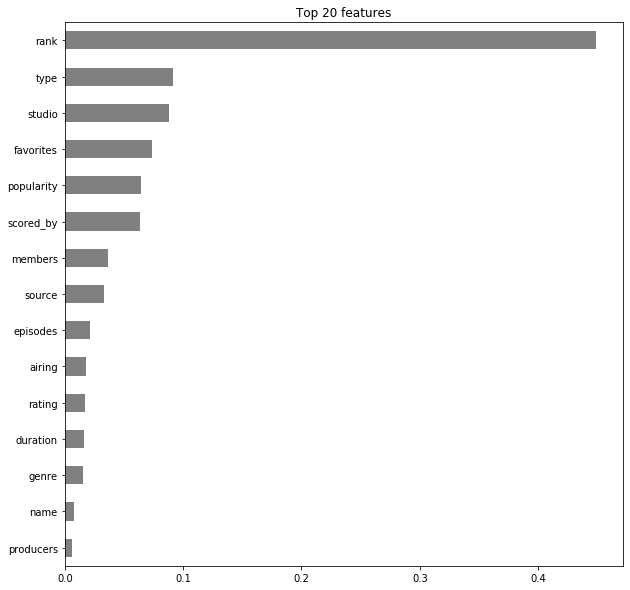

In [29]:
# Get feature importances
rf = pipeline.named_steps['xgbregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

## Permutation Importance

In [36]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
)

X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [33]:
!pip install eli5

     |████████████████████████████████| 112kB 4.8MB/s 


In [37]:
# import eli5

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

ValueError: ignored

In [39]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBRegressor(n_estimators=1000,    # <- 1000 trees, early stopping dependency)
                      max_depth=4,          # try deeper trees with high cardinality data
                      learning_rate=0.2,    # try higher learning rate
                      n_jobs=-1,)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

# Fit on train, score on val
model.fit(X_train_encoded, y_train,
          eval_metric='merror',
          eval_set=eval_set,
          early_stopping_rounds=25)

[05:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBoostError: ignored